# EDA and predicting depression

Muneera Alkubaisi, Fatima Hesham, Amna Yaser

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
Depression = pd.read_csv('b_depressed.csv')
Depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [4]:
#Data inspection and cleaning

In [5]:
Depression.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [6]:
Depression.no_lasting_investmen.value_counts()

28292707.0    425
11121784.0      3
3558971.0       3
20019212.0      3
60724945.0      3
             ... 
14723019.0      1
20464084.0      1
25046258.0      1
24094234.0      1
13012488.0      1
Name: no_lasting_investmen, Length: 939, dtype: int64

In [7]:
Depression.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [8]:
Depression = Depression[~(Depression.no_lasting_investmen.isnull())]
Depression = Depression.drop(['Survey_id','Ville_id'],axis=1)

In [9]:
Depression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    1409 non-null   int64  
 1   Age                    1409 non-null   int64  
 2   Married                1409 non-null   int64  
 3   Number_children        1409 non-null   int64  
 4   education_level        1409 non-null   int64  
 5   total_members          1409 non-null   int64  
 6   gained_asset           1409 non-null   int64  
 7   durable_asset          1409 non-null   int64  
 8   save_asset             1409 non-null   int64  
 9   living_expenses        1409 non-null   int64  
 10  other_expenses         1409 non-null   int64  
 11  incoming_salary        1409 non-null   int64  
 12  incoming_own_farm      1409 non-null   int64  
 13  incoming_business      1409 non-null   int64  
 14  incoming_no_business   1409 non-null   int64  
 15  inco

In [10]:
Depression.depressed.value_counts()

0    1174
1     235
Name: depressed, dtype: int64

In [11]:
#EDA

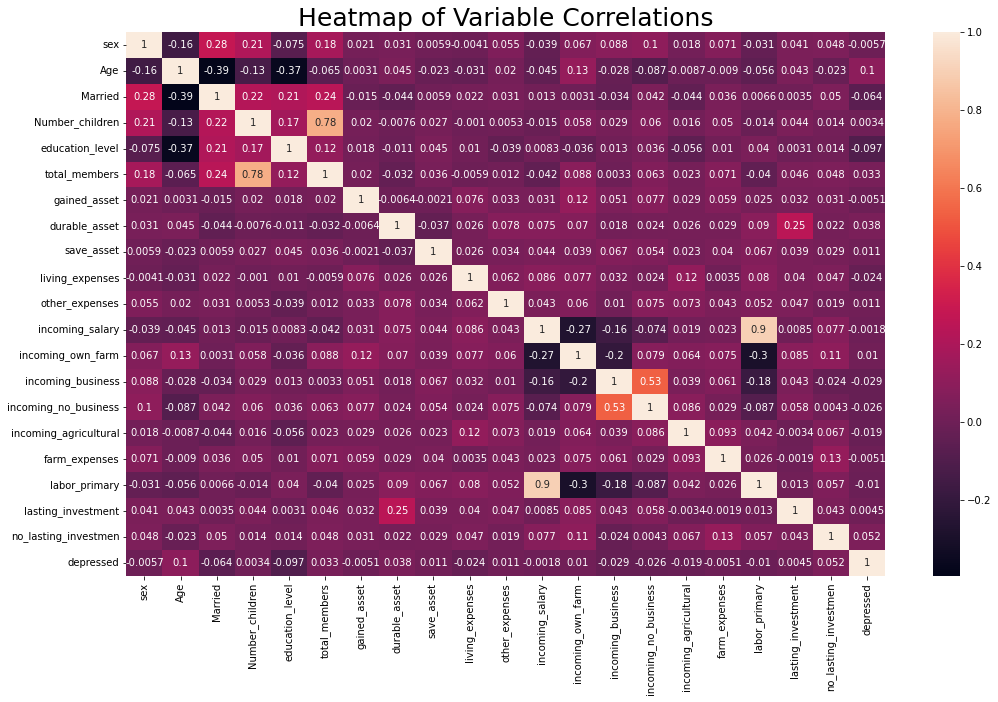

In [12]:
plt.figure(figsize=(17,10))
sns.heatmap(Depression.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()

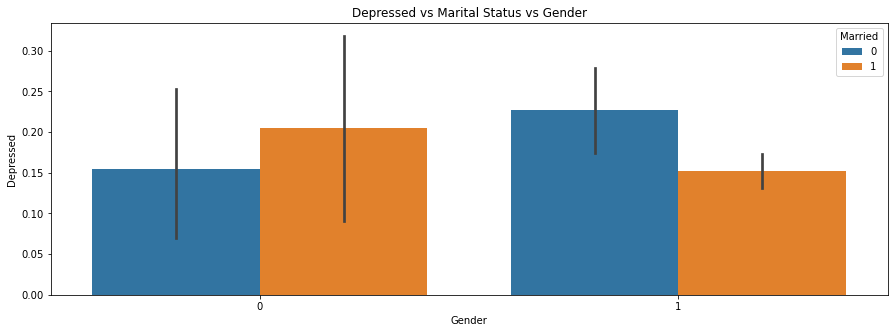

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex',y='depressed',hue='Married',data=Depression)
plt.title('Depressed vs Marital Status vs Gender')
plt.xlabel('Gender')
plt.ylabel('Depressed')
plt.show()

In [14]:
#Unmarried men are more depressed than married men. Married women are more depressed than unmarried women. 

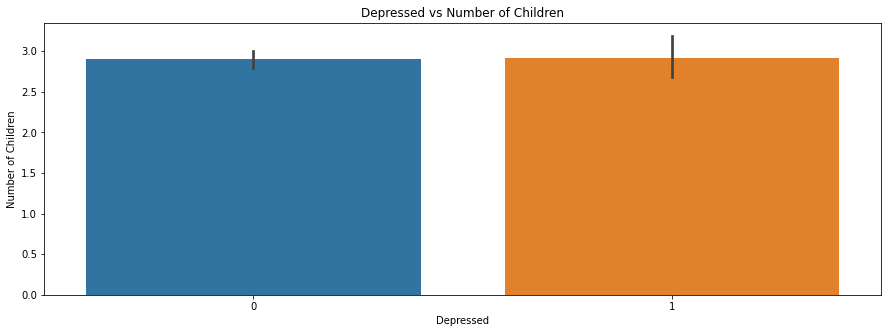

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='Number_children',data=Depression)
plt.title('Depressed vs Number of Children')
plt.xlabel('Depressed')
plt.ylabel('Number of Children')
plt.show()

In [16]:
#No clear difference 

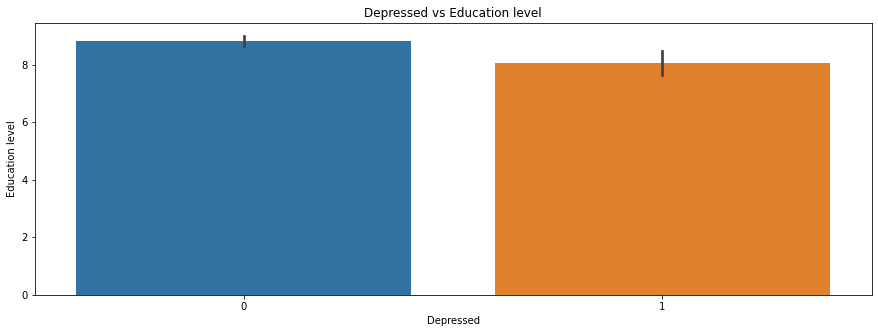

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='education_level',data=Depression)
plt.title('Depressed vs Education level')
plt.xlabel('Depressed')
plt.ylabel('Education level')
plt.show()

In [18]:
#Slight higer educated individuals are less deprresed. 

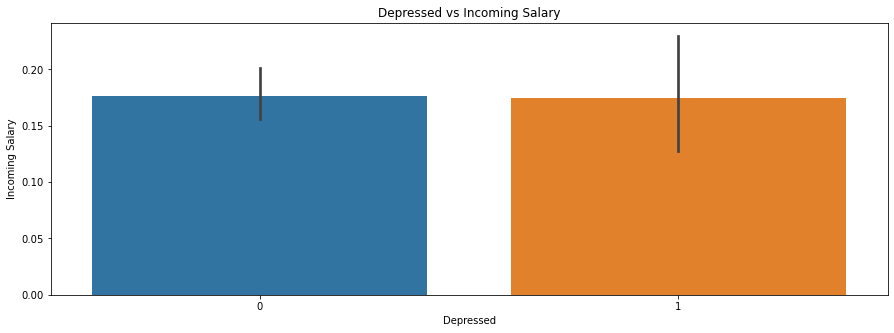

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='incoming_salary',data=Depression)
plt.title('Depressed vs Incoming Salary')
plt.xlabel('Depressed')
plt.ylabel('Incoming Salary')
plt.show()

In [20]:
#No clear difference 

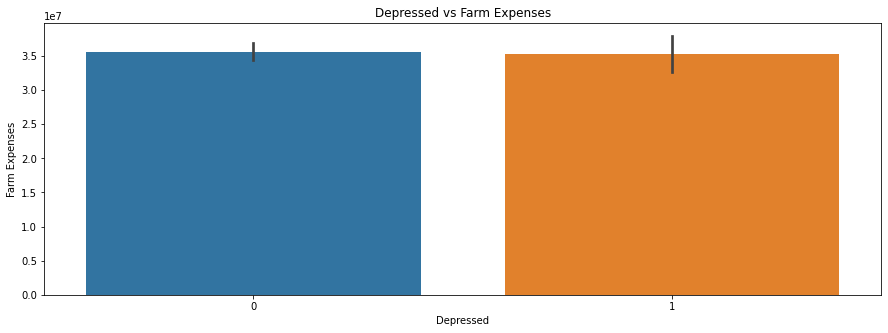

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='farm_expenses',data=Depression)
plt.title('Depressed vs Farm Expenses')
plt.xlabel('Depressed')
plt.ylabel('Farm Expenses')
plt.show()


In [22]:
#No clear difference 

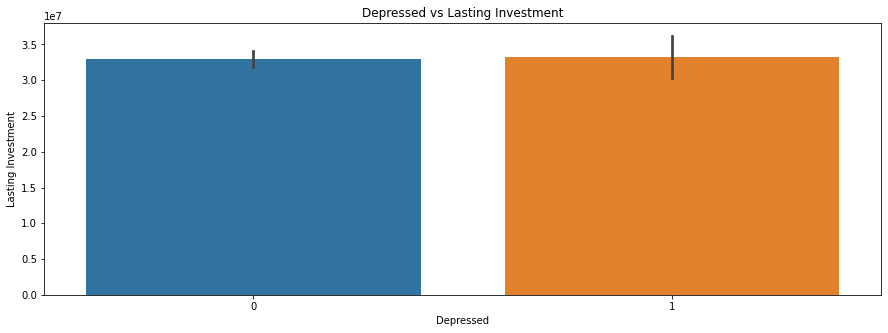

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='lasting_investment',data=Depression)
plt.title('Depressed vs Lasting Investment')
plt.xlabel('Depressed')
plt.ylabel('Lasting Investment')
plt.show()

In [24]:
#No clear difference 